<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Figure-2:-Complexity-plot-for-the-3-samples" data-toc-modified-id="Figure-2:-Complexity-plot-for-the-3-samples-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Figure 2: Complexity plot for the 3 samples</a></span></li></ul></div>

## Figure 2: Complexity plot for the 3 samples

In [1]:
library(dplyr)
library(reshape)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename




In [2]:
# define function to count unique reads mapped
frac_uniq_reads = function(dfr,prop){
    caca=sample_frac(dfr, size = prop, replace = FALSE)
    tots=dim(caca)[1]
    unicos=length(unique(caca$V1))    
    return(list(unicos,tots))           
}

In [3]:
# Percentages binning to calculate the unique/mapped proportion
jumps=seq(0.05,1,0.05)

In [4]:
# read all the files
mapfiles=Sys.glob("/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/*_Zebra_finch_*/01_mapped_r1/*full_1-end_*.map")

In [5]:
# define an empty list where to store the set of three
all_reads=list()
# iterate the files and cut the file 
for (i in mapfiles){
    # get the name of the individual
    aka=unlist(strsplit(i,"/"))[7]
    # Define the sequence file
    seqs=paste(i,".seqs",sep='')
    # run tha bash to cut the reads
    try(system(paste("cut -f2",i,">",seqs,sep=' '), intern = TRUE))
    # Now read the generated sequences for each file
    map=read.table(seqs,colClasses = ("character"))
    # define a data frame where to store
    un_reads <- data.frame(matrix(ncol = 2, nrow = 0))
    x <- c("uniques","total")
    colnames(un_reads) <- x
    # for each jump do the subsampling
    for (k in jumps){
        uns=data.frame(frac_uniq_reads(map,k))
        colnames(uns)=c("uniques","total")
        un_reads=bind_rows(un_reads,uns)
    }
    all_reads[[aka]] <- un_reads    
}

In [6]:
names(all_reads)

[1] "10_Zebra_finch_Oz13" "18_Zebra_finch_Mz13" "19_Zebra_finch_Mz17"

In [7]:
# Emulate ggplot colors :)
gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}
n = 3
cols = gg_color_hue(n)

In [8]:
options(scipen=999)

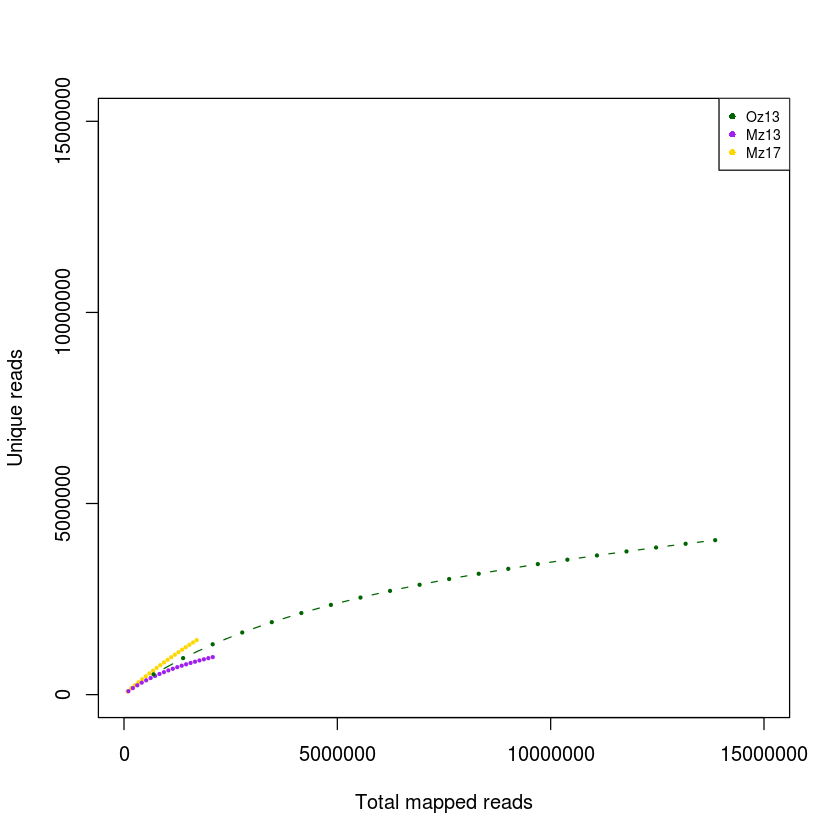

In [9]:
#pdf("/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/response_referees/library_complexity_exhaustion_fullmap.pdf")
plot(all_reads[[3]]$total,all_reads[[3]]$uniques,
     ylim=c(0,15000000),
     xlim=c(0,15000000),
#     ylim=c(0,15000000),
#     xlim=c(0,15000000),
     col='gold', # green
     type='b',
     pch=20,
     cex=0.5,
    xlab="Total mapped reads",
    ylab='Unique reads')
points(all_reads[[2]]$total,all_reads[[2]]$uniques,col='purple',type='b',pch=20, # red
     cex=0.5)
points(all_reads[[1]]$total,all_reads[[1]]$uniques,col='darkgreen',type='b',pch=20, # blue
     cex=0.5)

legend(x="topright", legend=c("Oz13", "Mz13","Mz17"),
       col=c("darkgreen", "purple","gold"), pch=16, cex=0.7)
#dev.off()

In [ ]:
# This saves a R list object into the file, which should be subsequently loaded into R using the function load()
save(all_reads,file="/home/jrodriguez/scratch/ancient_assembly_hic/paper_test_folder/Figure2_subsample_reads.Rdata")